In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vaex
from astropy.io import fits
import pandas as pd

ERROR:MainThread:vaex:issue loading reader
Traceback (most recent call last):
  File "/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/vaex/__init__.py", line 720, in <module>
    add_namespace = entry.load()
  File "/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2460, in load
    self.require(*args, **kwargs)
  File "/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2483, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  File "/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/pkg_resources/__init__.py", line 791, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.VersionConflict: (pyarrow 0.11.1 (/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages), Requirement.parse('pyarrow>=0.15'))


In [2]:
#open fits data
hdu = fits.open('m31_redsupergiants.fit')
scidata = hdu[1].data

#turn into dataframe and convert to csv
df = pd.DataFrame(scidata)
df.to_csv('m31_redsupergiants.csv')

In [3]:
#read the csv data from gaia and the vizier_cat
df = vaex.read_csv_and_convert('m31_gaia_4deg.csv')
df2 = vaex.read_csv_and_convert('m31_redsupergiants.csv')

Text(0.5, 1, 'Red Supergiants in M31')

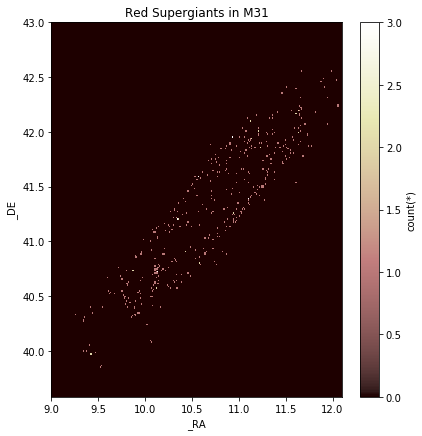

In [4]:
plt.figure(figsize=(6,6))
df2.plot(df2['_RA'] ,df2['_DE'], limits=[[9.0, 12.1], [39.58, 43.]],
        colormap='pink')
plt.title("Red Supergiants in M31")

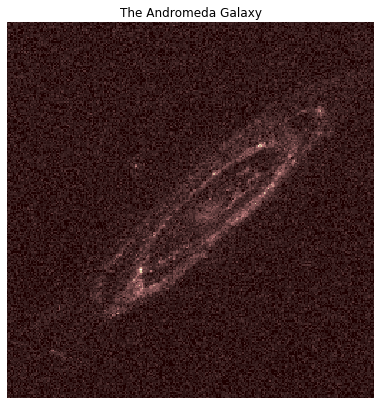

In [7]:
plt.figure(figsize=(6,6))
df.plot(df['ra'] ,df['dec'], limits=[[9.0, 12.1], [39.58, 43.]],colorbar=False,
       colormap='pink') #pink is good
plt.title("The Andromeda Galaxy")
plt.axis('off')
plt.savefig('M31_with_Gaia.png')
#plt.savefig('4_amelia_pink.png')